In [1]:
# IMPORACION DE BIBLIOTECAS

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


In [133]:
data = pd.read_csv("./train.csv", index_col = 0)

# Analysis of data


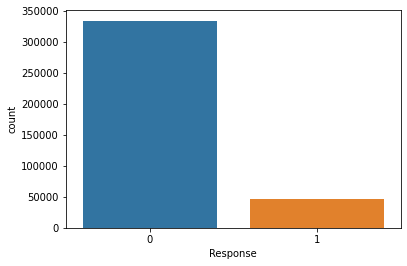

In [155]:
sns.countplot(data["Response"])


In [134]:
data["Response"].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

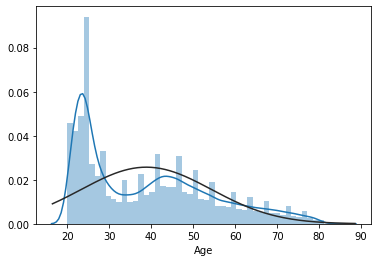

In [135]:
sns.distplot(data['Age'] , fit=norm);


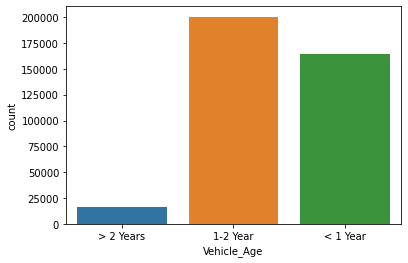

In [159]:
# Vehicle age
sns.countplot(data["Vehicle_Age"])


In [136]:
data.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [161]:
data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0


In [144]:
class_df = data.groupby('Gender').count()['Response'].reset_index().sort_values(by='Response',ascending=False)
class_df.style.background_gradient(cmap='winter')

,Gender,Response
1,Male,206089
0,Female,175020


In [146]:
class_df = data.groupby('Driving_License').count()['Response'].reset_index().sort_values(by='Response',ascending=False)
class_df.style.background_gradient(cmap='winter')

,Driving_License,Response
1,1,380297
0,0,812


In [138]:
columns = data.columns.values.tolist()

In [ ]:
for i in 
class_df = data.groupby('Gender').count()['Response'].reset_index().sort_values(by='Response',ascending=False)
class_df.style.background_gradient(cmap='winter')

In [ ]:
# Lost Valuses

In [ ]:
# porcentaje de valores vacios por columna
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

# Categorical Cols

In [ ]:
#Convert categorical columns to numeric

#I will use the One_Hot_encoder aproach because the low cardinality of these columns
from sklearn.preprocessing import OneHotEncoder


OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_cols = pd.DataFrame(OH_encoder.fit_transform(data[["Vehicle_Age","Gender","Vehicle_Damage"]]))

#I need to concat "data" with this dataset, but the index of OH_cols starts with "0" and data" with 1, so i going to change the "OH_cols" index
OH_cols.index = np.arange(1, len(OH_cols)+1)
OH_cols.head()

In [ ]:
data = data.drop(["Vehicle_Age","Gender","Vehicle_Damage"],axis=1)

In [ ]:
data = pd.concat([data,OH_cols],axis=1)

In [150]:
# The categories are unbalanced so i'm going to balance it with the SMOTE technique
data['Response'].value_counts()


0    334399
1     46710
Name: Response, dtype: int64

In [ ]:
# Train test split
X = data.drop("Response",axis=1)
y = data["Response"] 



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [152]:

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27,sampling_strategy=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)



# Models

In [166]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
import pickle
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report


from pylab import *


In [168]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 29.9min finished


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

In [ ]:
filename = 'rf_model.sav'
pickle.dump(model, open(filename, 'wb'))


filename = 'rf_model.sav'

rf_load = pickle.load(open(filename, 'rb'))


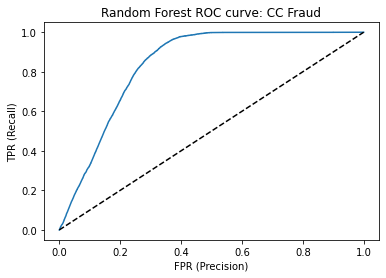

Area under curve (AUC):  0.8380420853390351


In [170]:
y_score = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('Random Forest ROC curve: CC Fraud')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))


In [171]:
confusion_matrix(y_test, y_score)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [154]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from xgboost import XGBClassifier

xgboost = XGBClassifier(n_estimators=500, learning_rate=0.040)


xgboost.fit(X_train, y_train,
          early_stopping_rounds  = 100 ,
          eval_set=[(X_test, y_test)]
         )


xgboost_pred =xgboost.predict(X_test)
print(classification_report(y_test,xgboost_pred))
confusion_matrix(y_test, xgboost_pred)

[0]	validation_0-error:0.24633
Will train until validation_0-error hasn't improved in 100 rounds.
[1]	validation_0-error:0.23382
[2]	validation_0-error:0.23589
[3]	validation_0-error:0.22772
[4]	validation_0-error:0.22772
[5]	validation_0-error:0.22595
[6]	validation_0-error:0.22595
[7]	validation_0-error:0.22772
[8]	validation_0-error:0.22595
[9]	validation_0-error:0.22595
[10]	validation_0-error:0.23235
[11]	validation_0-error:0.23122
[12]	validation_0-error:0.23122
[13]	validation_0-error:0.23108
[14]	validation_0-error:0.23108
[15]	validation_0-error:0.23108
[16]	validation_0-error:0.23108
[17]	validation_0-error:0.23108
[18]	validation_0-error:0.23108
[19]	validation_0-error:0.23081
[20]	validation_0-error:0.23010
[21]	validation_0-error:0.23010
[22]	validation_0-error:0.23010
[23]	validation_0-error:0.23010
[24]	validation_0-error:0.23010
[25]	validation_0-error:0.23010
[26]	validation_0-error:0.23140
[27]	validation_0-error:0.23140
[28]	validation_0-error:0.23106
[29]	validation

[250]	validation_0-error:0.17675
[251]	validation_0-error:0.17663
[252]	validation_0-error:0.17638
[253]	validation_0-error:0.17617
[254]	validation_0-error:0.17597
[255]	validation_0-error:0.17559
[256]	validation_0-error:0.17558
[257]	validation_0-error:0.17545
[258]	validation_0-error:0.17515
[259]	validation_0-error:0.17502
[260]	validation_0-error:0.17490
[261]	validation_0-error:0.17486
[262]	validation_0-error:0.17495
[263]	validation_0-error:0.17477
[264]	validation_0-error:0.17474
[265]	validation_0-error:0.17470
[266]	validation_0-error:0.17435
[267]	validation_0-error:0.17427
[268]	validation_0-error:0.17377
[269]	validation_0-error:0.17331
[270]	validation_0-error:0.17310
[271]	validation_0-error:0.17315
[272]	validation_0-error:0.17310
[273]	validation_0-error:0.17285
[274]	validation_0-error:0.17277
[275]	validation_0-error:0.17261
[276]	validation_0-error:0.17259
[277]	validation_0-error:0.17255
[278]	validation_0-error:0.17236
[279]	validation_0-error:0.17223
[280]	vali

[499]	validation_0-error:0.15269
              precision    recall  f1-score   support

           0       0.91      0.92      0.91     66881
           1       0.36      0.31      0.33      9341

    accuracy                           0.85     76222
   macro avg       0.63      0.62      0.62     76222
weighted avg       0.84      0.85      0.84     76222



array([[61669,  5212],
       [ 6418,  2923]], dtype=int64)